In [60]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [61]:
#Loading the dataset
data = pd.read_csv('/content/sample_data/train.csv')

In [62]:
data.shape

(1058, 35)

In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,57,0,Travel_Rarely,405,Research & Development,1,2,Life Sciences,1,1483,...,1,80,1,13,2,2,12,9,2,8
1054,49,0,Travel_Rarely,1490,Research & Development,7,4,Life Sciences,1,1484,...,2,80,2,29,3,3,8,7,0,7
1055,34,0,Travel_Frequently,829,Research & Development,15,3,Medical,1,1485,...,4,80,2,16,3,2,14,8,6,9
1056,28,1,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,4,80,1,5,3,4,3,2,1,2


In [6]:
#Get the basic information of the dataset and the feature's datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [7]:
#Count the empty (NaN, NAN, na) values in each column
data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [8]:
#View some basic statistical details like percentile, mean, standard deviation etc.
data.describe()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [9]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
data['Attrition'].value_counts()

,count
Attrition,
0,879
1,179


<Axes: xlabel='Attrition', ylabel='count'>

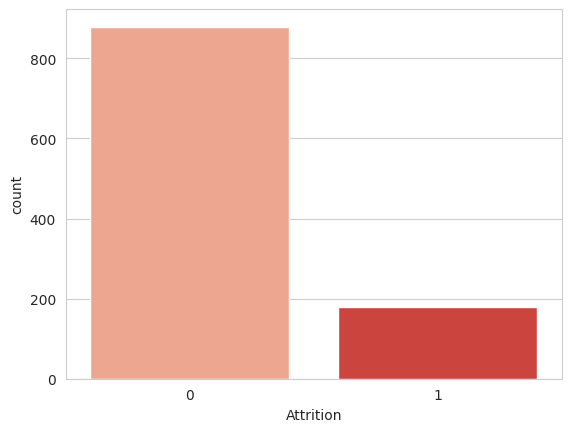

In [10]:
#Visualize this count
data['Attrition'].value_counts()
sns.set_style('whitegrid')
sns.countplot(x='Attrition', data=data, palette='Reds', hue = None, legend=False)

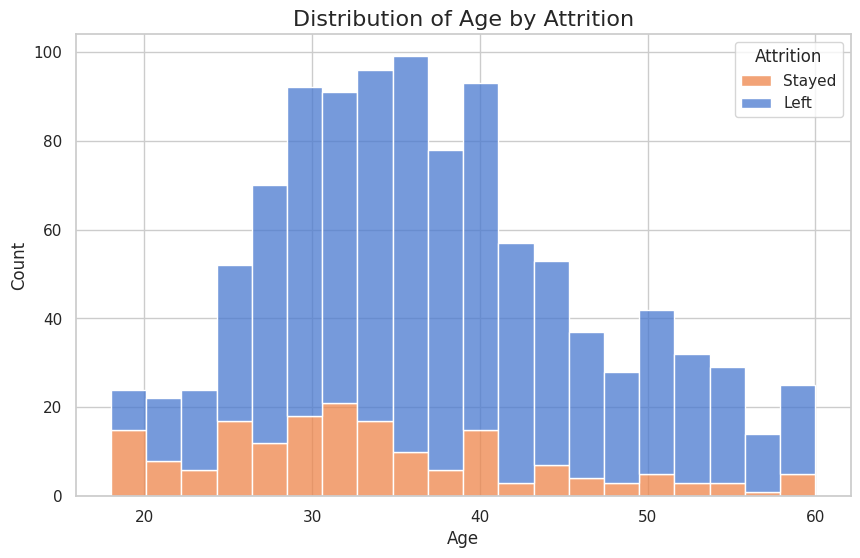

In [11]:
#Visualising Attrition dependency on age

# Setting up the plotting style
sns.set(style="whitegrid")

# Plot Attrition vs. Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=False, palette='muted', bins=20)
plt.title('Distribution of Age by Attrition', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

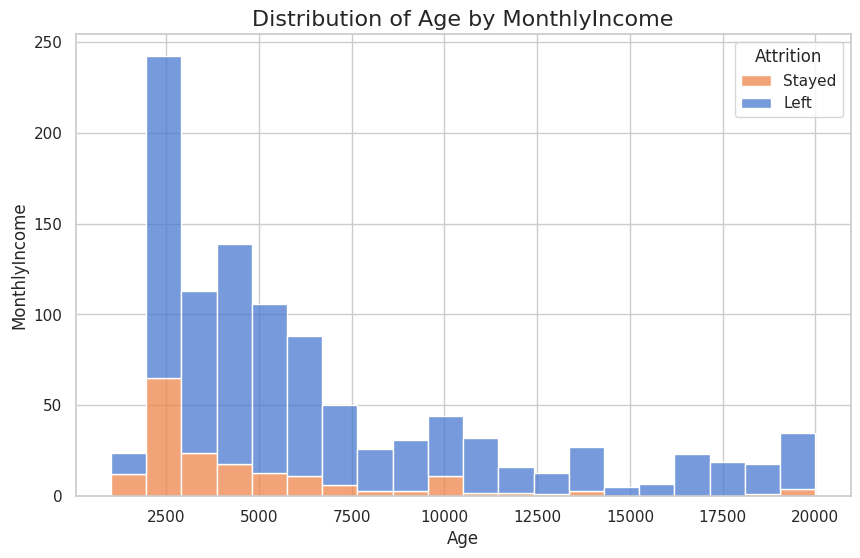

In [12]:
#Visualising Attrition dependency on Employee's income

# Setting up the plotting style
sns.set(style="whitegrid")

# Plot Attrition vs. Age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=False, palette='muted', bins=20)
plt.title('Distribution of Age by MonthlyIncome', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('MonthlyIncome', fontsize=12)
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

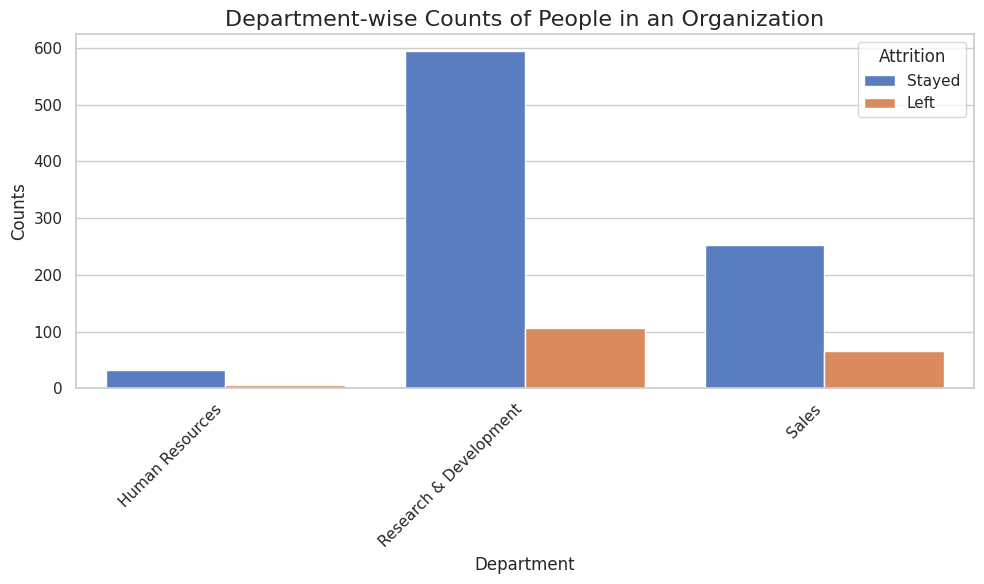

In [13]:
#Visualising Attrition dependency on Employee's Department

# Group by Department and Attrition to calculate counts
dept_att = data.groupby(['Department', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

# Replace Attrition values for better readability in the plot
dept_att['Attrition'] = dept_att['Attrition'].replace({0: 'Stayed', 1: 'Left'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=dept_att, x='Department', y='Counts', hue='Attrition', palette='muted')
plt.title('Department-wise Counts of People in an Organization', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


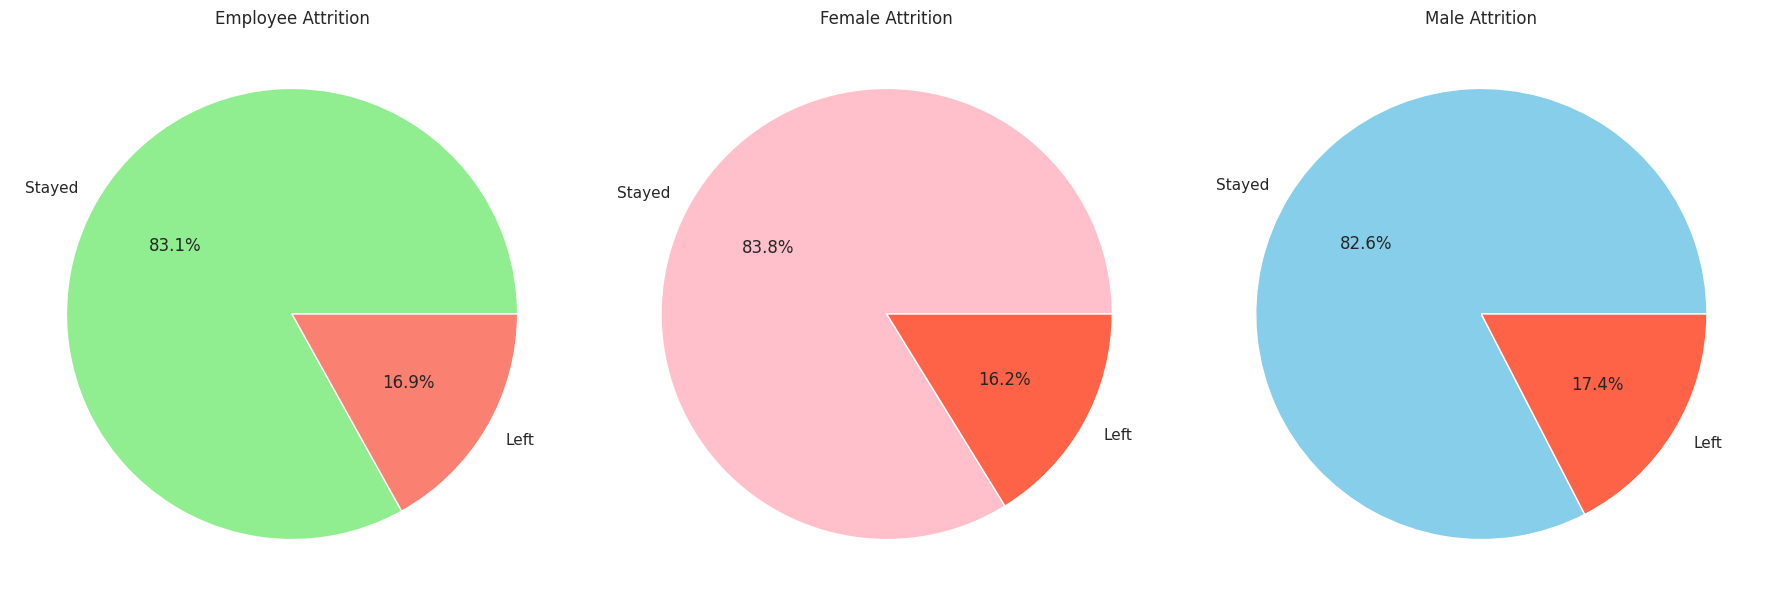

In [14]:
#Visualising Attrition dependency on Employee's Gender

# Grouping data for overall attrition
att1 = data.groupby('Attrition', as_index=False)['Age'].count()
att1['Count'] = att1['Age']
att1.drop('Age', axis=1, inplace=True)

# Grouping data for attrition by gender
att2 = data.groupby(['Gender', 'Attrition'], as_index=False)['Age'].count()
att2['Count'] = att2['Age']
att2.drop('Age', axis=1, inplace=True)

# Preparing data for pie charts
overall_counts = att1['Count'].values
female_counts = att2[att2['Gender'] == 'Female']['Count'].values
male_counts = att2[att2['Gender'] == 'Male']['Count'].values

# Creating pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overall Attrition
axes[0].pie(overall_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
axes[0].set_title('Employee Attrition')

# Female Attrition
axes[1].pie(female_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['pink', 'tomato'])
axes[1].set_title('Female Attrition')

# Male Attrition
axes[2].pie(male_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%', colors=['skyblue', 'tomato'])
axes[2].set_title('Male Attrition')

plt.tight_layout()
plt.show()


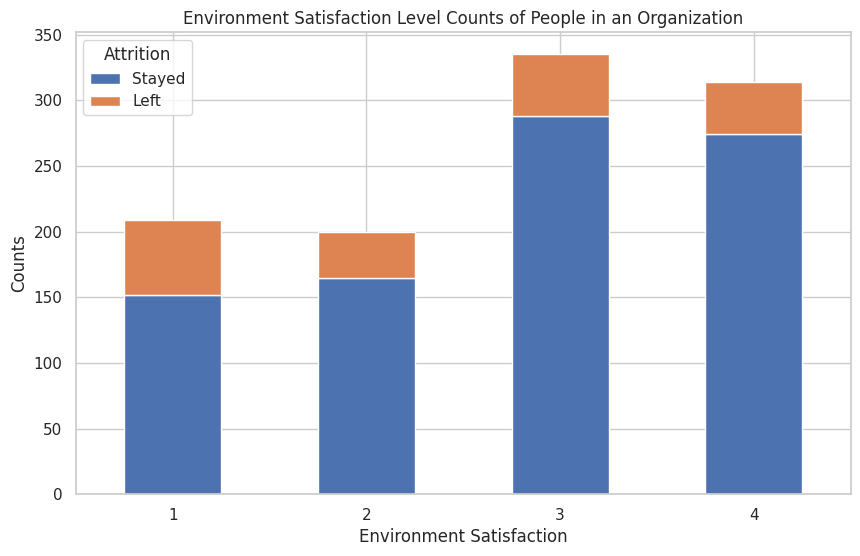

In [15]:
#Visualising Attrition dependency on Employee's Enviroment satisfaction rating

sats_att = data.groupby(['EnvironmentSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Pivot the data for plotting
sats_att = sats_att.pivot(index='EnvironmentSatisfaction', columns='Attrition', values='Counts')


# Create the stacked bar chart
sats_att.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Environment Satisfaction Level Counts of People in an Organization')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Attrition')
plt.legend(title = 'Attrition', labels = ['Stayed', 'Left'])

plt.show()

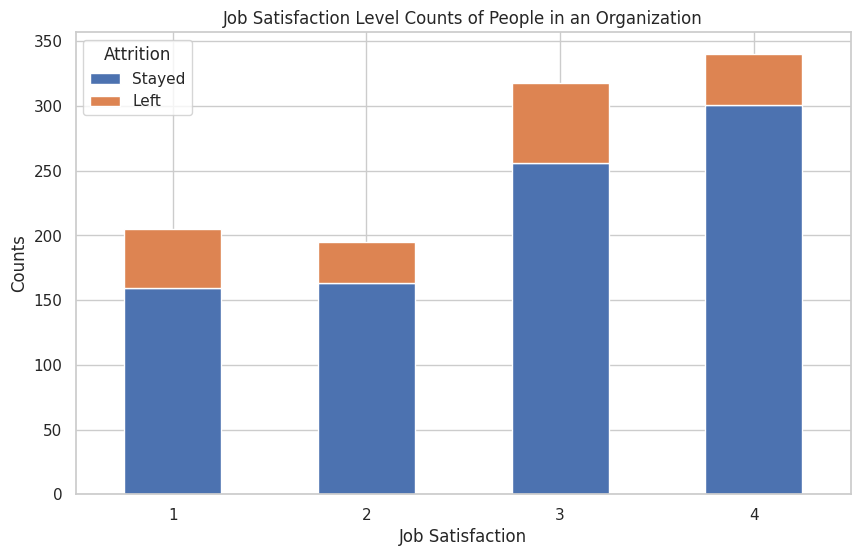

In [16]:
#Visualising Attrition dependency on Employee's Job satisfaction rating

job_att = data.groupby(['JobSatisfaction', 'Attrition'])['DailyRate'].count().reset_index(name='Counts')

# Pivot the data for plotting
job_att = job_att.pivot(index='JobSatisfaction', columns='Attrition', values='Counts')


# Create the stacked bar chart
job_att.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Job Satisfaction Level Counts of People in an Organization')
plt.xlabel('Job Satisfaction')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Attrition')
plt.legend(title = 'Attrition', labels = ['Stayed', 'Left'])

plt.show()

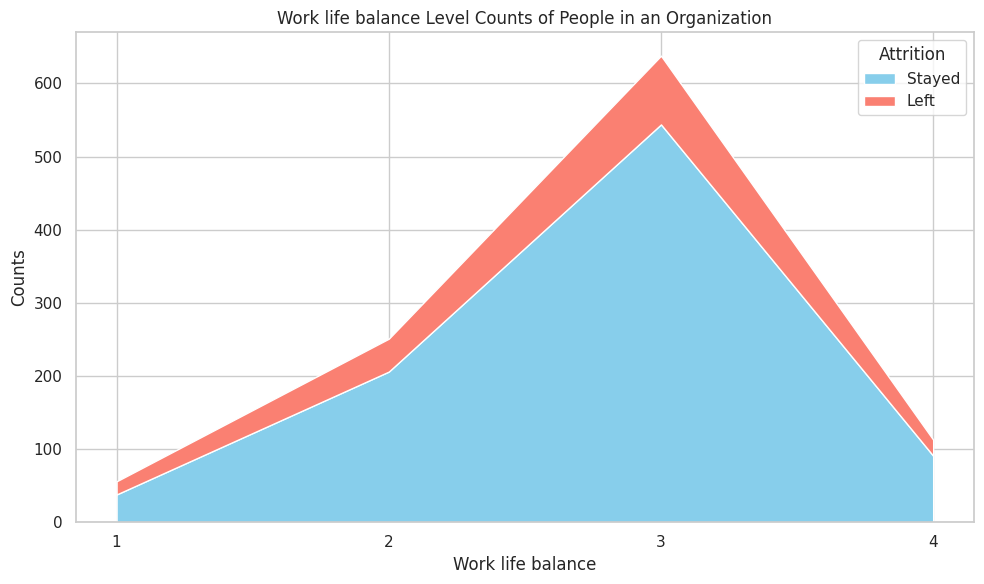

In [17]:
#Visualising Attrition dependency on Employee's Work Life Balance ratings

wlb_att = data.groupby(['WorkLifeBalance','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wlb_att = wlb_att.pivot(index='WorkLifeBalance', columns='Attrition', values='Counts').fillna(0)

wlb_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wlb_att.index, wlb_att['Stayed'], wlb_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Work life balance Level Counts of People in an Organization')
plt.xlabel('Work life balance')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wlb_att.index, labels=wlb_att.index, rotation=0)
plt.tight_layout()
plt.show()



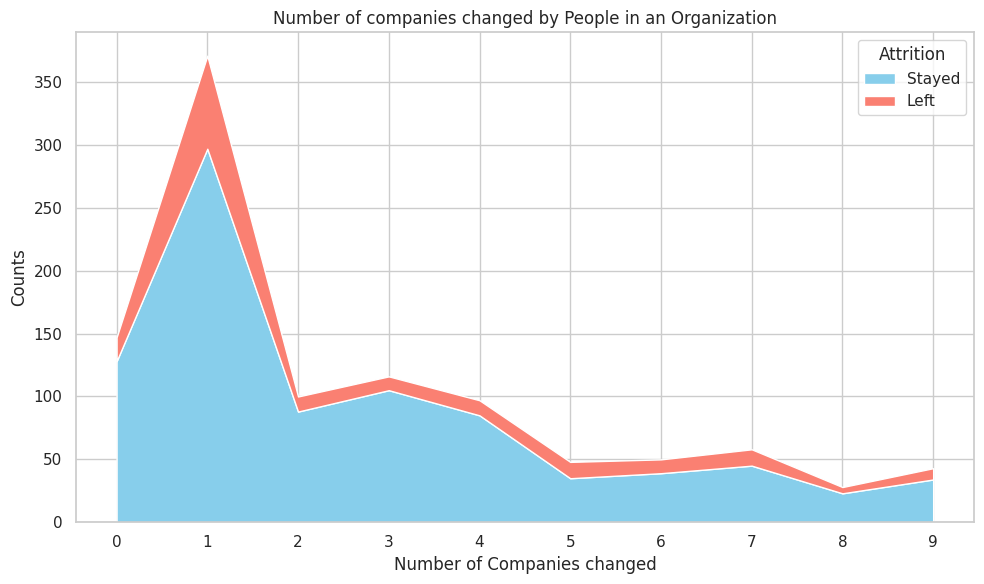

In [18]:
#Visualising Attrition dependency on Employee's work experience

wexp_att = data.groupby(['NumCompaniesWorked','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wexp_att = wexp_att.pivot(index='NumCompaniesWorked', columns='Attrition', values='Counts').fillna(0)

wexp_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wexp_att.index, wexp_att['Stayed'], wexp_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Number of companies changed by People in an Organization')
plt.xlabel('Number of Companies changed')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wexp_att.index, labels=wexp_att.index, rotation=0)
plt.tight_layout()
plt.show()

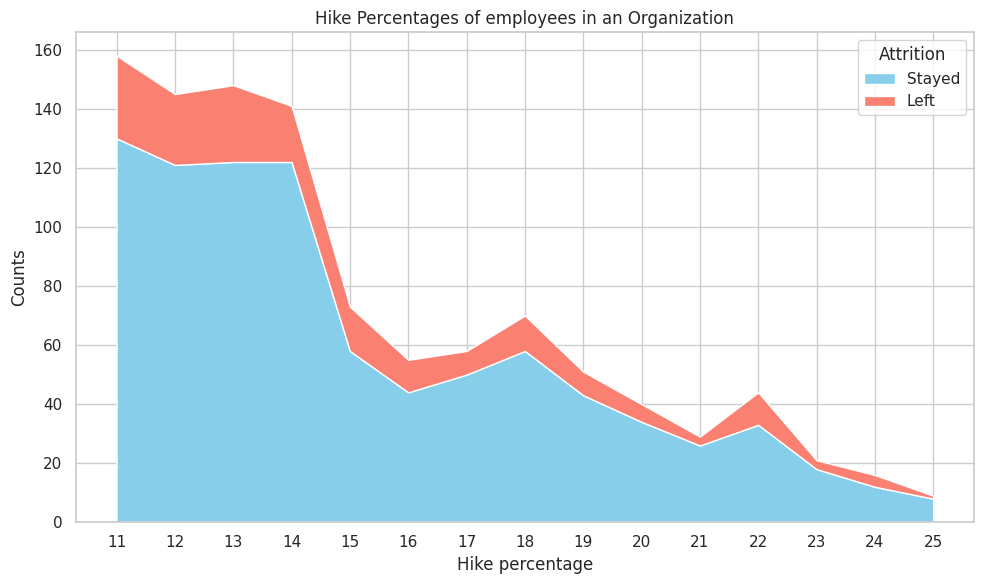

In [19]:
#Visualising Attrition dependency on Employee's Hike

whk_att = data.groupby(['PercentSalaryHike','Attrition'])['DailyRate'].count().reset_index(name='Counts')
whk_att = whk_att.pivot(index='PercentSalaryHike', columns='Attrition', values='Counts').fillna(0)

whk_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(whk_att.index, whk_att['Stayed'], whk_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Hike Percentages of employees in an Organization')
plt.xlabel('Hike percentage')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=whk_att.index, labels=whk_att.index, rotation=0)
plt.tight_layout()
plt.show()

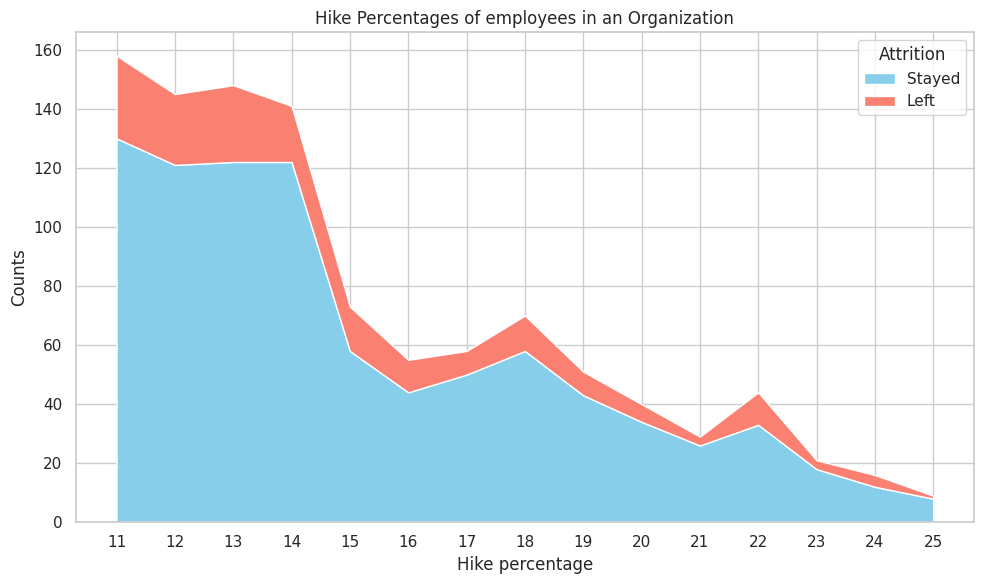

In [20]:
#Visualising Attrition dependency on Employee's experience count with manager

wm_att = data.groupby(['PercentSalaryHike','Attrition'])['DailyRate'].count().reset_index(name='Counts')
wm_att = wm_att.pivot(index='PercentSalaryHike', columns='Attrition', values='Counts').fillna(0)

wm_att.columns = ['Stayed', 'Left']

#Area chart
plt.figure(figsize=(10, 6))
plt.stackplot(wm_att.index, wm_att['Stayed'], wm_att['Left'], labels=['Stayed', 'Left'], colors=['skyblue', 'salmon'])
plt.title('Hike Percentages of employees in an Organization')
plt.xlabel('Hike percentage')
plt.ylabel('Counts')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(ticks=wm_att.index, labels=wm_att.index, rotation=0)
plt.tight_layout()
plt.show()

# PREPROCESSING

In [96]:
def onehot_encode(df, column):
  df = df.copy()
  dummies = pd.get_dummies(df[column], prefix=column, dtype = int)
  df = pd.concat([df, dummies], axis = 1)
  df = df.drop(column, axis = 1)
  return df




In [102]:
def preprocess_inputs(df):
  df = df.copy()

  #Dropping single-value columns and id-columns
  df = df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'], axis = 1)

  #Binary-encode Binary columns
  df['Gender'] = df['Gender'].replace({"Female" : 0, "Male" : 1})
  df['OverTime'] = df['OverTime'].replace({"No" : 0, "Yes" : 1})

  #Ordinal-encode BusinessTravel column
  df['BusinessTravel'] = df['BusinessTravel'].replace({"Non-Travel" : 0, "Travel_Rarely" : 1, "Travel_Frequently" : 2})

  # One-hot encoding
  for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
    df = onehot_encode(df, column = column)

  #Spliting and scaling the data
  y = df['Attrition']
  X = df.drop('Attrition', axis = 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

  return X_train, X_test, y_train, y_test



In [103]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [104]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
69,-0.151184,-0.178690,-1.225782,-0.001490,0.049628,1.171467,0.877687,0.668363,-1.036543,-0.989936,...,-0.463796,-0.288886,-0.338316,-0.242188,2.008485,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
491,0.589717,1.710319,0.449329,-0.001490,2.034728,1.171467,0.877687,0.320760,0.399865,-0.092200,...,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958
1024,1.013090,-0.178690,-1.125226,-0.858797,1.042178,-1.574739,-1.139358,0.817335,0.399865,1.703272,...,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
781,-1.209614,-0.178690,-1.534806,-0.981270,-0.942923,-1.574739,0.877687,-0.324787,-1.036543,-0.989936,...,2.156120,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
757,-0.362870,-0.178690,-1.475944,-0.981270,1.042178,-0.659337,0.877687,0.469733,1.836274,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.378031,1.710319,0.491023,-0.981270,0.049628,0.256065,-1.139358,0.022816,0.399865,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,1.852333,-0.239046,1.845200,-0.899606,-0.694958
847,-0.362870,1.710319,-0.364927,-0.981270,0.049628,1.171467,0.877687,1.562197,-1.036543,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,-0.899606,1.438937
715,-0.468713,1.710319,0.022580,-0.981270,1.042178,0.256065,-1.139358,0.916650,1.836274,-0.092200,...,-0.463796,-0.288886,-0.338316,-0.242188,-0.497888,-0.539860,-0.239046,-0.541947,1.111598,-0.694958
905,-0.892085,-0.178690,-0.303612,-0.981270,0.049628,1.171467,-1.139358,1.065622,-1.036543,1.703272,...,-0.463796,-0.288886,-0.338316,4.129017,-0.497888,-0.539860,-0.239046,1.845200,-0.899606,-0.694958
